### The APIs

#### The MATLAB-style API

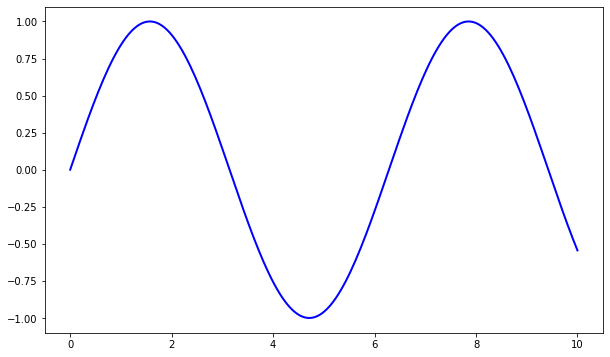

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) #set default figure size

import numpy as np

x = np.linspace(0, 10, 200)
y = np.sin(x)
plt.plot(x, y, 'b-', linewidth=2)
plt.show()

#### The Object-Oriented API

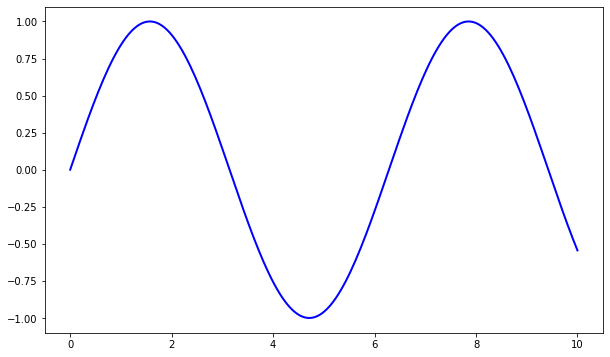

In [2]:
fig, ax = plt.subplots()
ax.plot(x, y, 'b-', linewidth=2)
plt.show()

#### Tweaks

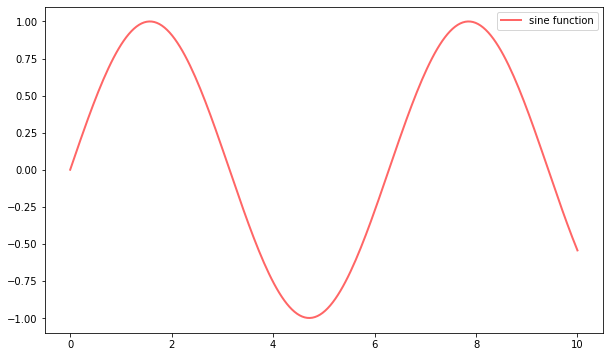

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend()
plt.show()

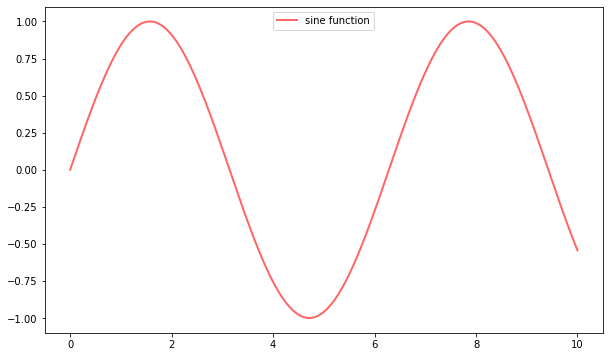

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

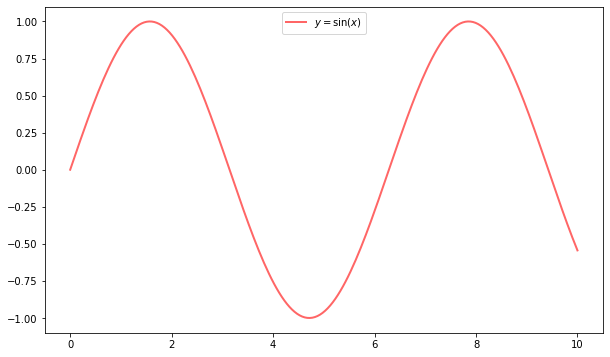

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

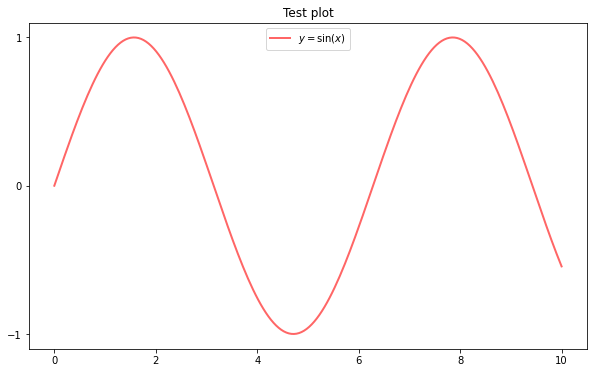

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('Test plot')
plt.show()

### More Features

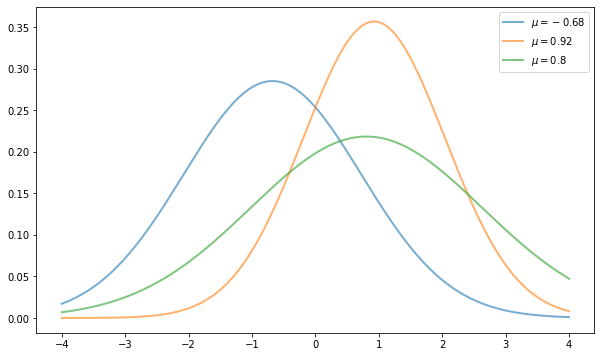

In [7]:
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)

for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)

ax.legend()
plt.show()

#### Multiple Subplots

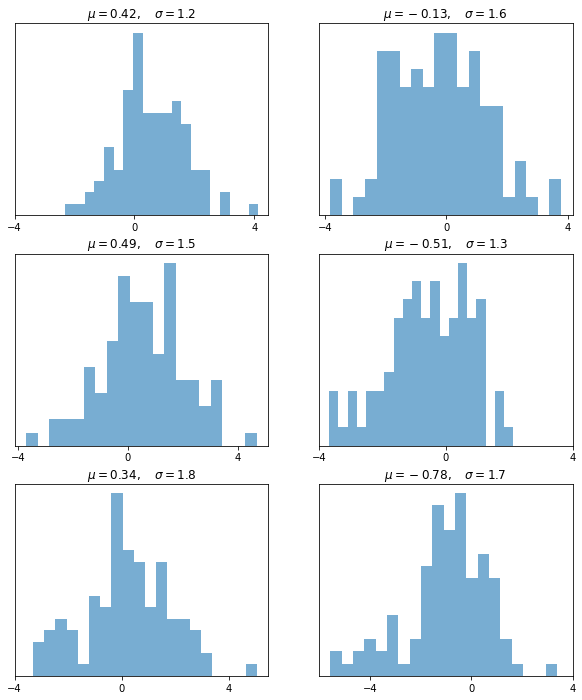

In [8]:
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))

for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
        axes[i, j].set(title=t, xticks=[-4, 0, 4], yticks=[])

plt.show()

#### 3D Plots

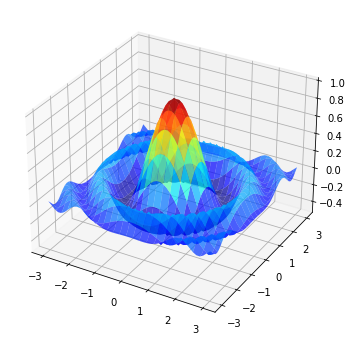

In [9]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,
                f(x, y),
                rstride = 2, 
                cstride = 2,
                cmap = cm.jet,
                alpha = 0.7,
                linewidth = 0.25)

ax.set_zlim(-0.5, 1.0)
plt.show()

#### A Customizing Function

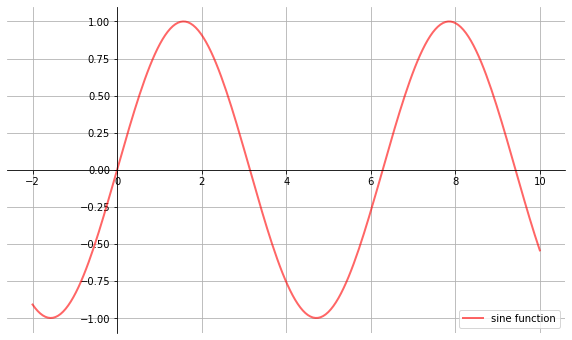

In [10]:
def subplots():
    "Custom subplots with axes through the origin"

    fig, ax = plt.subplots()
    
    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
    
    ax.grid()
    return fig, ax

fig, ax = subplots() # Call the local version, not plt.subplots()
x = np.linspace(-2, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')
plt.show()

#### Style Sheets

In [11]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [12]:
def draw_graphs(style='default'):
    
    # Setting a style sheet
    plt.style.use(style)
    
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    x = np.linspace(-13, 13, 150)
    
    # Set seed values to replicate results of random draws
    np.random.seed(9)
    
    for i in range(3):

        # Draw mean and standard deviation from uniform distributions
        m, s = np.random.uniform(-8, 8), np.random.uniform(2, 2.5)

        # Generate a normal density plot
        y = norm.pdf(x, loc=m, scale=s)
        axes[0].plot(x, y, linewidth=3, alpha=0.7)

        # Create a scatter plot with random X and Y values
        # from normal distributions
        rnormX = norm.rvs(loc=m, scale=s, size=150)
        rnormY = norm.rvs(loc=m, scale=s, size=150)
        axes[1].plot(rnormX, rnormY, ls='none', marker='o', alpha=0.7)

        # Create a histogram with random X values
        axes[2].hist(rnormX, alpha=0.7)

        # and a line graph with random Y values
        axes[3].plot(x, rnormY, linewidth=2, alpha=0.7)
    
    plt.suptitle(f'Style: {style}', fontsize=13)
    plt.show()

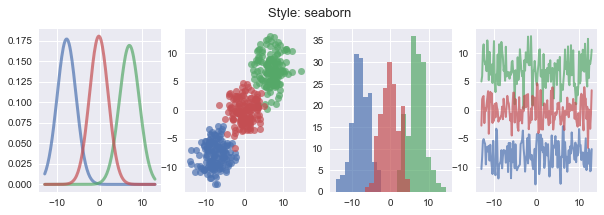

In [13]:
draw_graphs(style='seaborn')

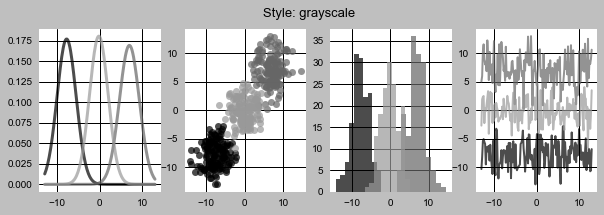

In [14]:
draw_graphs(style='grayscale')

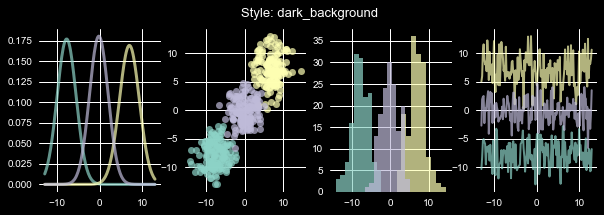

In [16]:
draw_graphs(style='dark_background')

In [17]:
print(plt.rcParams.keys())

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': 'black',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
          'axes.grid.w

In [18]:
from cycler import cycler

# set to the default style sheet
plt.style.use('default')

# You can update single values using keys:
# Set the font style to italic
plt.rcParams['font.style'] = 'italic'

# Update linewidth
plt.rcParams['lines.linewidth'] = 2

# You can also update many values at once using the update() method:
parameters = {# Change default figure size
              'figure.figsize': (5, 4),

              # Add horizontal grid lines
              'axes.grid': True,
              'axes.grid.axis': 'y',

              # Update colors for density lines
              'axes.prop_cycle': cycler('color',
                                        ['dimgray', 'slategrey', 'darkgray'])
              }

plt.rcParams.update(parameters)

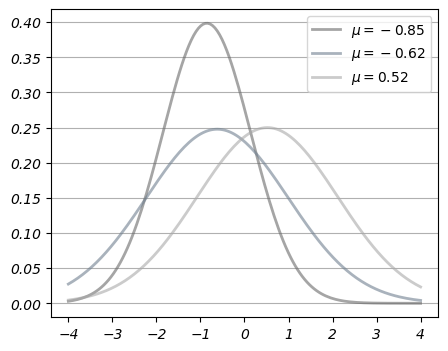

In [19]:
fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)

for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)

ax.legend()
plt.show()

In [20]:
plt.style.use('default')
# Reset default figure size
plt.rcParams['figure.figsize'] = (10, 6)

### Exercises

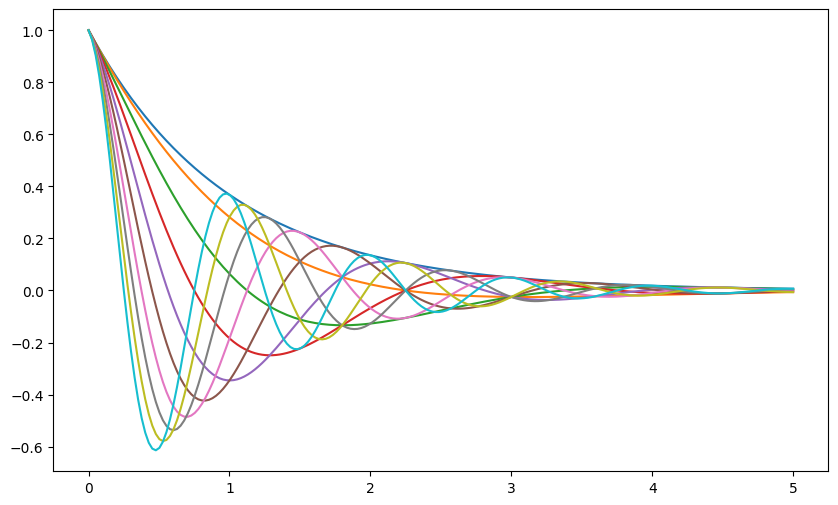

In [21]:
def f(x, θ):
    return np.cos(np.pi * θ * x ) * np.exp(- x)

θ_vals = np.linspace(0, 2, 10)
x = np.linspace(0, 5, 200)
fig, ax = plt.subplots()

for θ in θ_vals:
    ax.plot(x, f(x, θ))

plt.show()

### End.